## LeNet-5

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

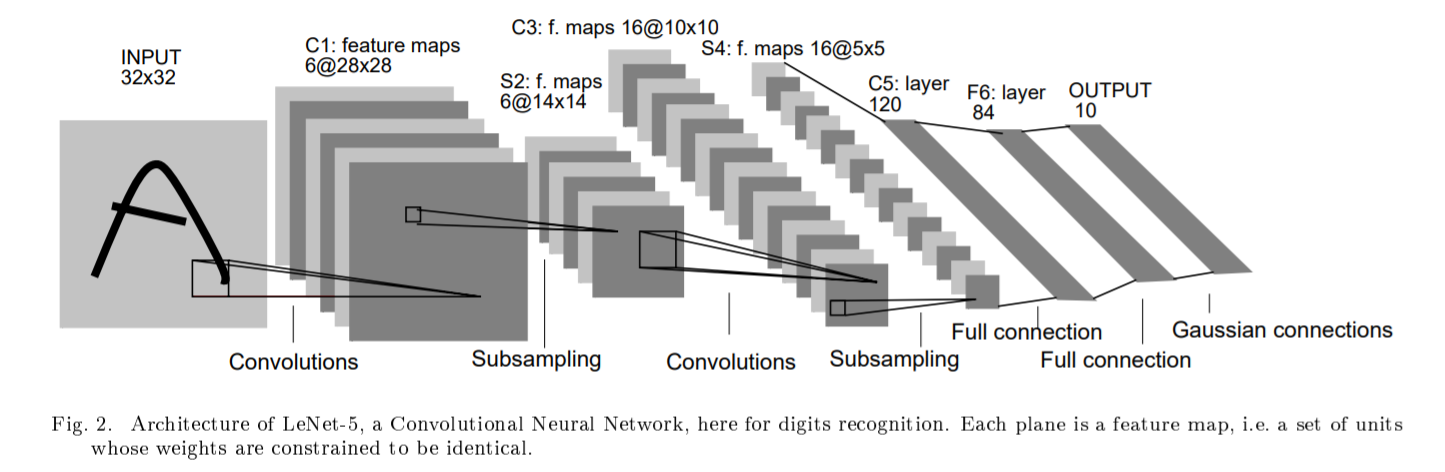

In [33]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,AveragePooling2D
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5,5), strides=1, padding = 'same', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(filters = 16, kernel_size = (5,5), strides=1, activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(filters = 120, kernel_size = (5,5), strides=1, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))  
model.add(Dense(10, activation='softmax'))  

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [34]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 480)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 84)              

## Cargamos los datos

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


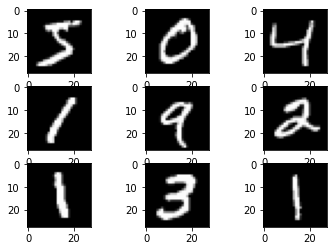

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,2) and requested shape (3,2)

In [43]:
# Cargar el dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Imprimir un resumen de los datos
print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))

# Plotear las primeras imágenes
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

# Normalizamos las imágenes
train_x_n = (train_x / 255) - 0.5
test_x_n = (test_x / 255) - 0.5

# padding para incremente la dimension a 32x32x1
train_x = np.pad(train_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_x = np.pad(test_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Hacemos reshape de las imágenes para que tengan un canal
train_x_n = train_x.reshape((train_x_n.shape[0], 28, 28, 1))
test_x_n = test_x.reshape((test_x_n.shape[0], 28, 28, 1))


In [41]:
train_x.shape

(60000, 28, 28)

In [36]:
# Entrenamos el modelo
model.fit(
  train_x_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_x_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_x_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_x[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Epoch 1/3


ValueError: in user code:

    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_9 is incompatible with the layer: expected axis -1 of input shape to have value 480 but received input with shape [32, 120]
